# Text Summarization
![](https://blog.floydhub.com/content/images/2019/04/romain-vignes-53940-unsplash.jpg)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Importing the required libraries and dataset
5. Data Pre-processing
6. Data Cleaning
7. Model creation
    - Spliting the dataset
    - Visualizing the attributes
    - Vectorization
    - Final Model Creation
    - Inference
8. Additional! Creating a Python function
9. Conclusion

************************
### Abstract
Summarization is the task of condensing a piece of text to a shorter version, reducing the size of the initial text while at the same time preserving key informational elements and the meaning of content. Since manual text summarization is a time expensive and generally laborious task, the automatization of the task is gaining increasing popularity and therefore constitutes a strong motivation for academic research.

There are important applications for text summarization in various NLP related tasks such as text classification, question answering, legal texts summarization, news summarization, and headline generation. Moreover, the generation of summaries can be integrated into these systems as an intermediate stage which helps to reduce the length of the document.

### Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : https://www.kaggle.com/pariza/bbc-news-summary.

### Goal
The goal of this project is to create a model which will summarize the articles given by the users. In addition I will be creating a Python function to make the model more user friendly!
***********************

### Importing required libraries and Dataset

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import os
from nltk.corpus import stopwords
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Flatten,Dropout,BatchNormalization,Embedding,Input,TimeDistributed
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

### Data Preprocessing
Data preprocessing is an important step in the data mining process. The phrase " is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values, impossible data combinations, and missing values, etc.

In [94]:
all_data=[]
Articles_with_stopwords=[]
Articles_without_stopwords=[]
Summaries=[]
stop_words=set(stopwords.words('english'))
for d,path,filenames in tqdm(os.walk('/kaggle/input')):
    for file in filenames:
        if os.path.isfile(d+'/'+file):
            if('Summaries' in d+'/'+file):
                with open(d+'/'+file,'r',errors='ignore') as f:
                    summary=''.join([i.rstrip() for i in f.readlines()])
                    Summaries.append(summary)
                    f.close()
            else:
                with open(d+'/'+file,'r',errors='ignore') as f:
                    Article=''.join([i.rstrip() for i in f.readlines()])
                    Articles_with_stopwords.append(Article)
                    Articles_without_stopwords.append(' '.join([w for w in Article.split() if w not in stop_words]))
                    f.close()
        
                    

29it [00:06,  4.28it/s]


In [95]:
print(len(Articles_with_stopwords),len(Articles_without_stopwords),len(Summaries))

4450 4450 4450


In [96]:
data=pd.DataFrame({'Articles without stop words':Articles_without_stopwords,'Article with stop words': Articles_with_stopwords,'Summary':Summaries})
data.head()

,Articles without stop words,Article with stop words,Summary
0,Commodore finds new lease lifeThe once-famous ...,Commodore finds new lease of lifeThe once-famo...,"In the chronology of home computing, Commodore..."
1,China net cafe culture crackdownChinese author...,China net cafe culture crackdownChinese author...,Laws on net cafe opening hours and who can use...
2,Nintendo handheld given Euro dateNintendo's ne...,Nintendo handheld given Euro dateNintendo's ne...,More than 120 games are in development for the...
3,Microsoft sets sights spywareWindows users cou...,Microsoft sets sights on spywareWindows users ...,Windows users could soon be paying Microsoft t...
4,Britons fed net serviceA survey conducted PC P...,Britons fed up with net serviceA survey conduc...,"Every month the prices drop, and more and more..."


In [97]:
data['Articles without stop words'][0]

'Commodore finds new lease lifeThe once-famous Commodore computer brand could resurrected bought US-based digital music distributor.New owner Yeahronimo Media Ventures ruled possibility new breed Commodore computers. It also plans develop "worldwide entertainment concept" brand, although details yet known. The groundbreaking Commodore 64 computer elicits fond memories owned one back 1980s.In chronology home computing, Commodore one pioneers.The Commodore 64, launched 1982, one first affordable home PCs. It followed years later Amiga. The Commodore 64 sold single computer system, even day. The brand languished somewhat 1990s. Commodore International filed bankruptcy 1994 sold Dutch firm Tulip Computers. In late 1980s firm great rival Atari, produced range home computers brand video games, formerly known Infogrames.Tulip Computers sold several products Commodore name, including portable USB storage devices digital music players. It planned relaunch brand, following upsurge nostalgia 1980

In [98]:
for i in range(5):
    print(data['Article with stop words'][i])
    print("---------------------------------------------")

Commodore finds new lease of lifeThe once-famous Commodore computer brand could be resurrected after being bought by a US-based digital music distributor.New owner Yeahronimo Media Ventures has not ruled out the possibility of a new breed of Commodore computers. It also plans to develop a "worldwide entertainment concept" with the brand, although details are not yet known. The groundbreaking Commodore 64 computer elicits fond memories for those who owned one back in the 1980s.In the chronology of home computing, Commodore was one of the pioneers.The Commodore 64, launched in 1982, was one of the first affordable home PCs. It was followed a few years later by the Amiga. The Commodore 64 sold more than any other single computer system, even to this day. The brand languished somewhat in the 1990s. Commodore International filed for bankruptcy in 1994 and was sold to Dutch firm Tulip Computers. In the late 1980s the firm was a great rival to Atari, which produced its own range of home compu

In [99]:
data['Summary'][0]

'In the chronology of home computing, Commodore was one of the pioneers.The Commodore 64, launched in 1982, was one of the first affordable home PCs.Commodore International filed for bankruptcy in 1994 and was sold to Dutch firm Tulip Computers.The once-famous Commodore computer brand could be resurrected after being bought by a US-based digital music distributor.The Commodore 64 sold more than any other single computer system, even to this day.In the late 1980s the firm was a great rival to Atari, which produced its own range of home computers and is now a brand of video games, formerly known as Infogrames.'

### Data Cleaning
Data cleansing or data cleaning is the process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [100]:
import re

In [101]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [102]:
def clean_text(text):
    
    text=text.lower()
    text=' '.join([contraction_mapping[i] if i in contraction_mapping.keys() else i for i in text.split()])
    text=re.sub(r'\(.*\)',"",text)
    text=re.sub("'s","",text)
    text=re.sub('"','',text)
    text=' '.join([i for i in text.split() if i.isalpha()])
    text=re.sub('[^a-zA-Z]'," ",text)
    
    return text

In [103]:
data['Article with stop words']=data['Article with stop words'].apply(clean_text)
data['Articles without stop words']=data['Articles without stop words'].apply(clean_text)
data['Summary']=data['Summary'].apply(clean_text)
data['Summary']='<START> '+data['Summary']+' <END>'

In [104]:
data['Article with stop words'][0]

'commodore finds new lease of lifethe commodore computer brand could be resurrected after being bought by a digital music owner yeahronimo media ventures has not ruled out the possibility of a new breed of commodore it also plans to develop a worldwide entertainment concept with the although details are not yet the groundbreaking commodore computer elicits fond memories for those who owned one back in the the chronology of home commodore was one of the commodore launched in was one of the first affordable home it was followed a few years later by the the commodore sold more than any other single computer even to this the brand languished somewhat in the commodore international filed for bankruptcy in and was sold to dutch firm tulip in the late the firm was a great rival to which produced its own range of home computers and is now a brand of video formerly known as computers sold several products under the commodore including portable usb storage devices and digital music it had planne

In [105]:
data['Articles without stop words'][0]

'commodore finds new lease lifethe commodore computer brand could resurrected bought digital music owner yeahronimo media ventures ruled possibility new breed commodore it also plans develop worldwide entertainment concept although details yet the groundbreaking commodore computer elicits fond memories owned one back chronology home commodore one commodore launched one first affordable home it followed years later the commodore sold single computer even the brand languished somewhat commodore international filed bankruptcy sold dutch firm tulip in late firm great rival produced range home computers brand video formerly known computers sold several products commodore including portable usb storage devices digital music it planned relaunch following upsurge nostalgia commodore enthusiasts written emulators windows apple mac even pdas original commodore games still the sale commodore expected complete three weeks deal worth'

In [106]:
data['Summary'][0]

'<START> in the chronology of home commodore was one of the commodore launched in was one of the first affordable home international filed for bankruptcy in and was sold to dutch firm tulip commodore computer brand could be resurrected after being bought by a digital music commodore sold more than any other single computer even to this the late the firm was a great rival to which produced its own range of home computers and is now a brand of video formerly known as <END>'

**********************************
## Model Creation

**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 70:30 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [107]:
X_train,X_val,Y_train,Y_val=train_test_split(data['Article with stop words'],data['Summary'],test_size=0.3,random_state=29)
print(len(X_train),len(Y_train))
print(len(X_val),len(Y_val))

3115 3115
1335 1335


### Visualizing the Dataset based on Article and Summary

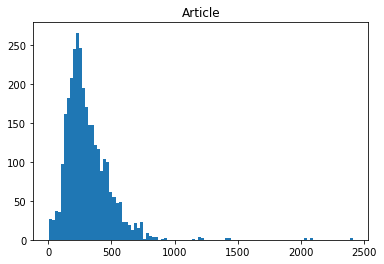

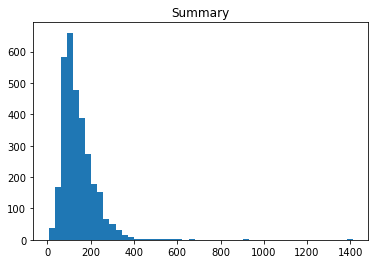

In [108]:
art_len=[len(i.split()) for i in X_train]
sum_len=[len(i.split()) for i in Y_train]
plt.hist(art_len,bins=100)
plt.title('Article')
plt.show()
plt.hist(sum_len,bins=50)
plt.title('Summary')
plt.show()

In [109]:
max_art_len=500
max_sum_len=100

### Vectorization on the dataset
Vectorization is a technique by which you can make your code execute fast. It is a very interesting and important way to optimize algorithms when you are implementing it from scratch.
Now, with the help of highly optimized numerical linear algebra libraries in C/C++, Octave/Matlab, Python, …etc. We can make our code run efficiently.
In machine learning, there’s a concept of an optimization algorithm that tries to reduce the error and computes to get the best parameters for the machine learning model.

In [110]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [111]:
article_tokenizer=Tokenizer(oov_token='<UNK>')
article_tokenizer.fit_on_texts(X_train)
tokenized_X_train=article_tokenizer.texts_to_sequences(X_train)
tokenized_X_val=article_tokenizer.texts_to_sequences(X_val)

In [112]:
art_vocab_size=len(article_tokenizer.word_index)+1

In [113]:
padded_X_train=pad_sequences(tokenized_X_train,maxlen=max_art_len,padding='post',truncating='post')
padded_X_val=pad_sequences(tokenized_X_val,maxlen=max_art_len,padding='post',truncating='post')

In [114]:
print(padded_X_train.shape,padded_X_val.shape)

(3115, 500) (1335, 500)


In [115]:
summary_tokenizer=Tokenizer(oov_token='<UNK>')
summary_tokenizer.fit_on_texts(Y_train)
tokenized_Y_train=summary_tokenizer.texts_to_sequences(Y_train)
tokenized_Y_val=summary_tokenizer.texts_to_sequences(Y_val)

In [116]:
sum_vocab_size=len(summary_tokenizer.word_index)+1

In [117]:
padded_Y_train=pad_sequences(tokenized_Y_train,maxlen=max_sum_len,padding='post',truncating='post')
padded_Y_val=pad_sequences(tokenized_Y_val,maxlen=max_sum_len,padding='post',truncating='post')

In [118]:
print(padded_Y_train.shape,padded_Y_val.shape)

(3115, 100) (1335, 100)


In [119]:
reverse_art_index=article_tokenizer.index_word
reverse_sum_index=summary_tokenizer.index_word
sum_wordindex=summary_tokenizer.word_index

### Final Model Deployment
Before deploying the main model let us discuss about the Neural Network and to be precise the Long Short Term Memory RNN.

**Neural Network** : A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.

**Reccurrent Neural Network** : RNNs are a powerful and robust type of neural network, and belong to the most promising algorithms in use because it is the only one with an internal memory.

Like many other deep learning algorithms, recurrent neural networks are relatively old. They were initially created in the 1980’s, but only in recent years have we seen their true potential. An increase in computational power along with the the massive amounts of data that we now have to work with, and the invention of long short-term memory (LSTM) in the 1990s, has really brought RNNs to the foreground.

**Long Short Term Memory** : Recurrent Neural Networks suffer from short-term memory. If a sequence is long enough, they’ll have a hard time carrying information from earlier time steps to later ones. So if you are trying to process a paragraph of text to do predictions, RNN’s may leave out important information from the beginning.

During back propagation, recurrent neural networks suffer from the vanishing gradient problem. Gradients are values used to update a neural networks weights. The vanishing gradient problem is when the gradient shrinks as it back propagates through time. If a gradient value becomes extremely small, it doesn’t contribute too much learning.

LSTM ’s and GRU’s were created as the solution to short-term memory. They have internal mechanisms called gates that can regulate the flow of information.

let's deploy the model using LSTM!

In [120]:
encoder_inputs=Input(shape=(max_art_len,))
encoder_emb=Embedding(art_vocab_size,100,trainable=True,name='Encoder_Embedding_layer')(encoder_inputs)
encoder_lstm1=LSTM(300,return_sequences=True,return_state=True,name='Encoder_LSTM1')
enclstm1_outputs,enclstm1_h,enclstm1_c=encoder_lstm1(encoder_emb)


decoder_inputs=Input(shape=(None,))
decoder_em=Embedding(sum_vocab_size,100,trainable=True,name='Decoder_Embedding_layer')
decoder_emb=decoder_em(decoder_inputs)

decoder_lstm1=LSTM(300,return_sequences=True,return_state=True,name='Decoder_LSTM1')
declstm1_output,declstm1_h,declstm1_c=decoder_lstm1(decoder_emb,initial_state=[enclstm1_h,enclstm1_c])

output_layer=TimeDistributed(Dense(sum_vocab_size,activation='softmax',name='softmax'))
output=output_layer(declstm1_output)

model=Model([encoder_inputs,decoder_inputs],output)

model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Encoder_Embedding_layer (Embedd (None, 500, 100)     2429300     input_7[0][0]                    
__________________________________________________________________________________________________
Decoder_Embedding_layer (Embedd (None, None, 100)    1577700     input_8[0][0]                    
______________________________________________________________________________________

In [121]:
# plot_model(model,show_shapes=True)

In [122]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy')

In [123]:
model.fit([padded_X_train,padded_Y_train[:,:-1]],padded_Y_train[:,1:],
          epochs=1,
          validation_data=([padded_X_val,padded_Y_val[:,:-1]],padded_Y_val[:,1:]),
          batch_size=64)

49/49 [==============================] - 327s 7s/step - loss: 7.5159 - val_loss: 6.6499


### Inference
An ML lifecycle can be broken up into two main, distinct parts. The first is the training phase, in which an ML model is created or “trained” by running a specified subset of data into the model. ML inference is the second phase, in which the model is put into action on live data to produce actionable output.

In [138]:
infencoder_model=Model(inputs=[encoder_inputs],outputs=[enclstm1_outputs,enclstm1_h,enclstm1_c])

infdecoder_model_state_input_h=Input(shape=(300,),name='infdec_I1')
infdecoder_model_state_input_c=Input(shape=(300,),name='infdec_I2')

infdeclstm1_output,infdec_h,infdec_c=decoder_lstm1(decoder_emb,initial_state=[infdecoder_model_state_input_h,
                                                                                                infdecoder_model_state_input_c
                                                                                               ])

infdec_output=output_layer(infdeclstm1_output)                         

infdecoder_model=Model(inputs=[decoder_inputs]+[infdecoder_model_state_input_h,infdecoder_model_state_input_c],
                       outputs=[infdec_output]+[infdec_h,infdec_c])



In [139]:
infencoder_model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
Encoder_Embedding_layer (Emb (None, 500, 100)          2429300   
_________________________________________________________________
Encoder_LSTM1 (LSTM)         [(None, 500, 300), (None, 481200    
Total params: 2,910,500
Trainable params: 2,910,500
Non-trainable params: 0
_________________________________________________________________


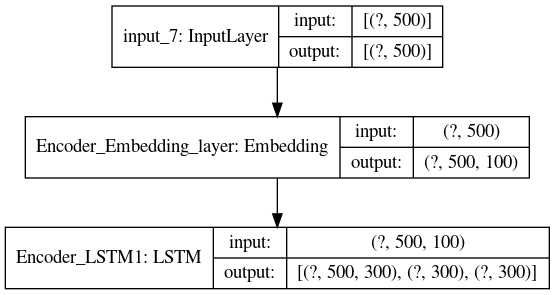

In [140]:
plot_model(infencoder_model,show_shapes=True)

In [141]:
infdecoder_model.summary()

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Decoder_Embedding_layer (Embedd (None, None, 100)    1577700     input_8[0][0]                    
__________________________________________________________________________________________________
infdec_I1 (InputLayer)          [(None, 300)]        0                                            
__________________________________________________________________________________________________
infdec_I2 (InputLayer)          [(None, 300)]        0                                            
______________________________________________________________________________________

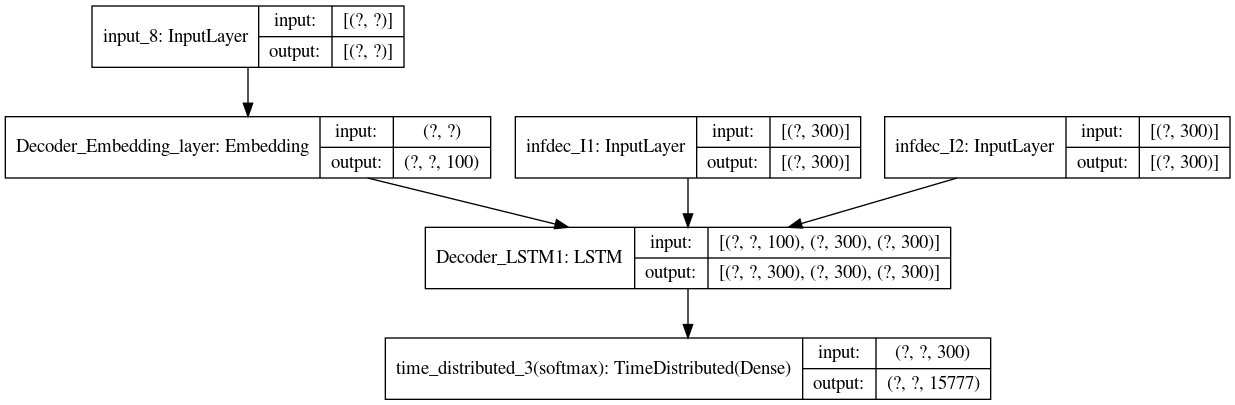

In [142]:
plot_model(infdecoder_model,show_shapes=True)

************************
### Additional! Creating a Python function for making the model user friendly!

In [143]:
def decode_sequence(inp_seq):
    
    enc_out,enc_h,enc_c=infencoder_model.predict(inp_seq)
    
    tar_seq=np.zeros((1,1))
    tar_seq[0,0]=sum_wordindex['start']
    
    stop_loop=False
    decoded_string=''
    
    while not stop_loop:
       
        dec_out,dec_h,dec_c=infdecoder_model.predict([tar_seq]+[enc_h,enc_c])
        
        tar_token_index=np.argmax(dec_out[0,-1,:])
        tar_token_word=sum_wordindex[tar_token_index]
        
        if tar_token_word =='end' or len(decoded_string)>=max_art_len:
            
            stop_loop=True
        else:
            decoded_string+=tar_token_word
            
            tar_seq=np.zeros((1,1))
            tar_seq[0,0]=tar_token_index
            
            
            enc_h=dec_h
            enc_c=dec_c
            
    return decoded_string

In [144]:
def seq2art(inp_seq):
    
    art=''
    
    for i in range(len(inp_seq)):
        
        if inp_seq[i]==0:
            break
        art+=reverse_art_index[inp_seq[i]]+' '
        
    return art


def seq2sum(inp_seq):
    
    summary=''
    
    for i in range(len(inp_seq)):
        
        if inp_seq[i]==0:
            break
        word=reverse_sum_index[inp_seq[i]]
        summary+=word+' '
            
    return summary
        

*******************
## Conclusion
* Text Summarization models are one of the hot topics of the deep learning model deployment.
* **Recurrent Neural Network** is the best choice for this kind of topics.
* Here we have used **Long Short Term Memory**, which shows the validation loss of 6.49 only, which shows the accuracy of the model.
* After inference, the model's validation loss decreased, and it is only 4.58.
* LSTM on Inference is the best model to be fitted with this dataset.
* Hence, the **Text Summarization Model** successfully deployed and working properly.
* Last but not the least, the python function is made with **Sequence to Sequence Model**, which makes the function user friendly!

************************************
### Hope this project will help you. Thank you!